## Clustering

In this notebook, we will work through a set of problems clustering, another cannonical form of unsupervised learning. Clustering is an important tool that is used to discover homogeneous groups of data points within a heterogeneous population. It can be the main goal in some problems, while in others it may be used in EDA to understand the main types of behavior in the data or in feature engineering.   

We will start by generating some artificial data, and then we will utilize clustering algorithms described in lectures and explore the impact of feature engineering on the solution. We will then attempt to find clusters in a gene expression dataset. 

## Outline

1. [Problem Definition and Setup: Simulated Example](#setup1)
2. [K-means: Simulated Example](#kmeans1)
3. [Hierarchical Clustering: Simulated Example](#hc)
4. [Gene Expression Data](#genedata)
5. [Hierarchical Clustering: Gene Expression Data](#hc_genedata)
6. [K-means Clustering: Gene Expression Data](#kmeans_genedata)

### Problem Definition and Setup: Simulated Example <a id='setup1'></a>

### Packages

First, lets load in some packages to get us started. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

## Data: Simulated Example

We will begin with a simple simulated example in which there are truly three clusters. We assume that there are $D=2$ features and within each cluster, the data points are generated from a spherical normal distribution $N(\mathbf{m}_k, \sigma^2_k \mathbf{I})$ for clusters $k=1,2,3$, where both the mean $\mathbf{m}_k$ and variance $\sigma^2_k$ are different across clusters. Specifically, we assume that: 

* Cluster 1: contains $|C_1|=500$ points with mean vector $\mathbf{m}_1 = \begin{pmatrix} 0 \\ 4 \end{pmatrix}$ with standard deviation $\sigma_1 = 2$.
* Cluster 2: contains $|C_2|=250$ points with mean vector $\mathbf{m}_2 = \begin{pmatrix} 0 \\ -4 \end{pmatrix}$ with standard deviation $\sigma_2 = 1$.
* Cluster 3: contains $|C_3|=100$ points with mean vector $\mathbf{m}_3 = \begin{pmatrix} -4 \\ 0 \end{pmatrix}$ with standard deviation $\sigma_3 = 0.5$.

#### Task 1 

Generate the dataset described above and store it in array called `X`.

Visualise your data and color by the true cluster labels.

In [2]:
# Number of features
D = 2

# Cluster sizes
N_1 = 500
N_2 = 250
N_3 = 100

# Cluster means
m_1 = np.array([0., 4.])
m_2 = np.array([0., -4.])
m_3 = np.array([-4., 0.])

# Cluster standard deviations
sd_1 = 2.
sd_2 = 1.
sd_3 = 0.5

# Generate the data
rnd = np.random.RandomState(0)
X_1 = rnd.normal(loc = m_1, scale = sd_1, size = (N_1,D))
X_2 = rnd.normal(loc = m_2, scale = sd_2, size = (N_2,D))
X_3 = rnd.normal(loc = m_3, scale = sd_3, size = (N_3,D))
X = np.vstack((X_1, X_2, X_3))

# Save true cluster labels
cl = np.hstack((np.repeat(1,N_1),np.repeat(2,N_2),np.repeat(3,N_3)))

In [3]:
# Check that the size is correct
print(X.shape)

(850, 2)


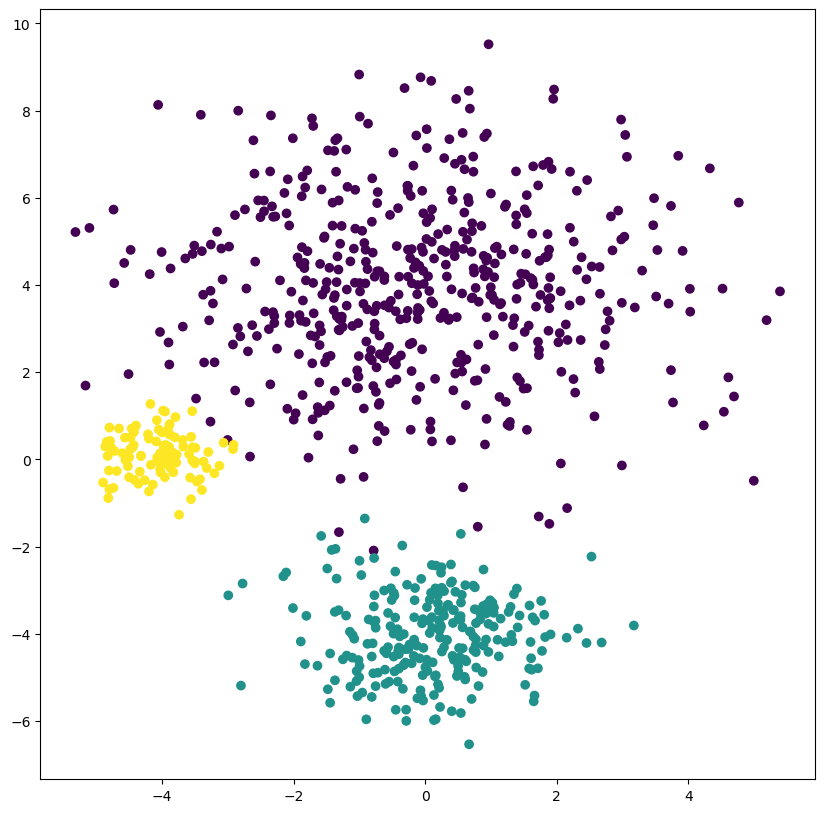

In [4]:
# Plot the data and color by cluster membership
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=cl)
plt.show()

# K-means Clustering: Simulated Example <a id='kmeans1'></a>

To perform K-means clustering, we will use `KMeans()` in `sklearn.cluster`. Documentation is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), and for an overview of clustering methods available in `sklearn`, see [link](https://scikit-learn.org/stable/modules/clustering.html). There are different inputs we can specify when calling `KMeans()` such as:

- `n_clusters`: the number of clusters. 
- `init`: which specifies the intialization of the centroids, e.g. can be set to `k-means++` for K-means++ initialization or `random` for random initialization.
- `n_init`: which specifies the number of times the algorithm is run with different random initializations
- `random_state`: this can bet set to a fixed number to make results reproducible.

We can then use the `.fit()` method of `KMeans` to run the K-means algorithm on our data.

After fitting, some of the relevant attributes of interest include:

- `labels_`: cluster assignments of the data points.
- `cluster_centers_`: mean corresponding to each cluster, stored in a matrix of size: number of clusters $K$ times number features $D$.
- `inertia_`: the total within-cluster variation.

#### Task 2

Let's start by exploring how the clustering changes across the K-means iterations. To do, set:

- number of clusters to 3
- initialization to random
- number of times the algorithm is run to 1
- fix the random seed to a number of your choice (e.g. 2)


a) Now, fit the K-means algorithms with different values of the maximum number of iterations fixed to 1,2,3, and the default value of 300. 

b) Plot the clustering solution for the four different cases and comment on how it changes. 

c) How many iterations are needed for the convergence?

In [5]:
# Part a
kmeans_it1 = KMeans(n_clusters = 3, init = 'random', n_init =1, random_state=0, max_iter =1).fit(X)
kmeans_it2 = KMeans(n_clusters = 3, init = 'random', n_init =1, random_state=0, max_iter =2).fit(X)
kmeans_it3 = KMeans(n_clusters = 3, init = 'random', n_init =1, random_state=0, max_iter =3).fit(X)
kmeans = KMeans(n_clusters = 3, init = 'random',n_init =1, random_state=0).fit(X)

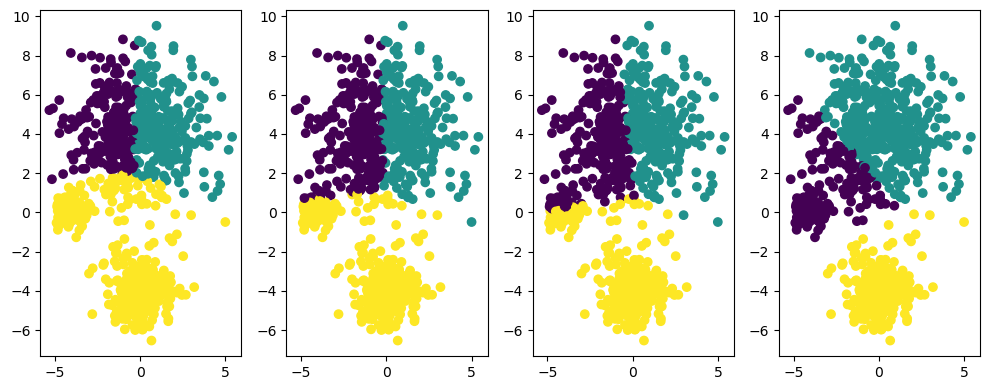

In [6]:
# Part b
fig, ax = plt.subplots(1,4,figsize=(10,4))
ax[0].scatter(X[:,0], X[:,1], c=kmeans_it1.labels_)
ax[1].scatter(X[:,0], X[:,1], c=kmeans_it2.labels_)
ax[2].scatter(X[:,0], X[:,1], c=kmeans_it3.labels_)
ax[3].scatter(X[:,0], X[:,1], c=kmeans.labels_)
fig.tight_layout()

The algorithm becomes better at discovering the well separated cluster centred at $(0,-4)^T$ as it progresses.

In [7]:
kmeans.n_iter_

13

Only 13 iterations were required to reach convergence.

#### Task 3

Next, compare the random intialization with K-means++ (in this case fix the number of different initializations to 10). Plot both clustering solutions. Which requires fewer iterations? and which provides a lower within-cluster variation?

In [8]:
# Fit with both random and plus plus initializations 
kmeans_rnd = KMeans(n_clusters = 3, init = 'random',n_init =10, random_state=0).fit(X)
kmeans_pp = KMeans(n_clusters = 3,n_init =10, random_state=0).fit(X)

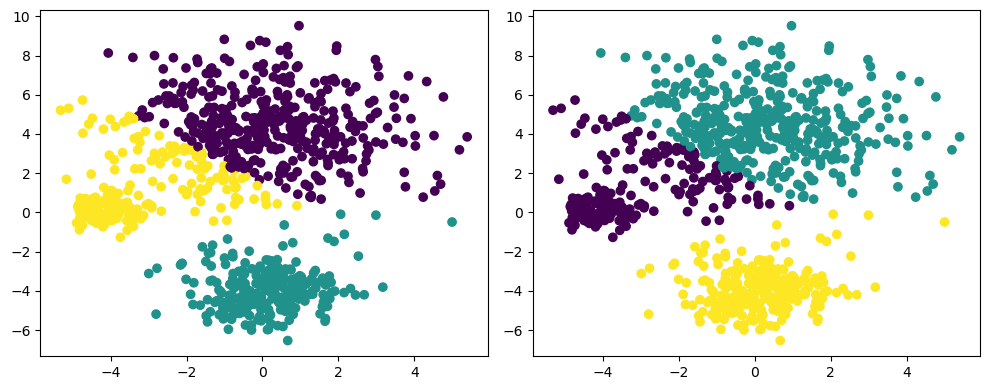

In [9]:
# Plot both solutions
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].scatter(X[:,0], X[:,1], c=kmeans_rnd.labels_)
ax[1].scatter(X[:,0], X[:,1], c=kmeans_pp.labels_)
fig.tight_layout()

In [10]:
print('Number of iterations with random:', kmeans_rnd.n_iter_,' and with ++:',kmeans_pp.n_iter_)

Number of iterations with random: 11  and with ++: 9


In [11]:
print('Within-cluster variation with random:', kmeans_rnd.inertia_,' and with ++:',kmeans_pp.inertia_)

Within-cluster variation with random: 3728.8375745347034  and with ++: 3728.8375745347034


In this case, both algorithms find the same clustering solution but the ++ initialization requires fewer iterations (faster). 

#### Task 4

Find the clustering solution using a different number of initializations equal to 1, 2, 5, 10, and 20. Visualize and comment on the results. Try changing the random state; how does that change your conclusions?

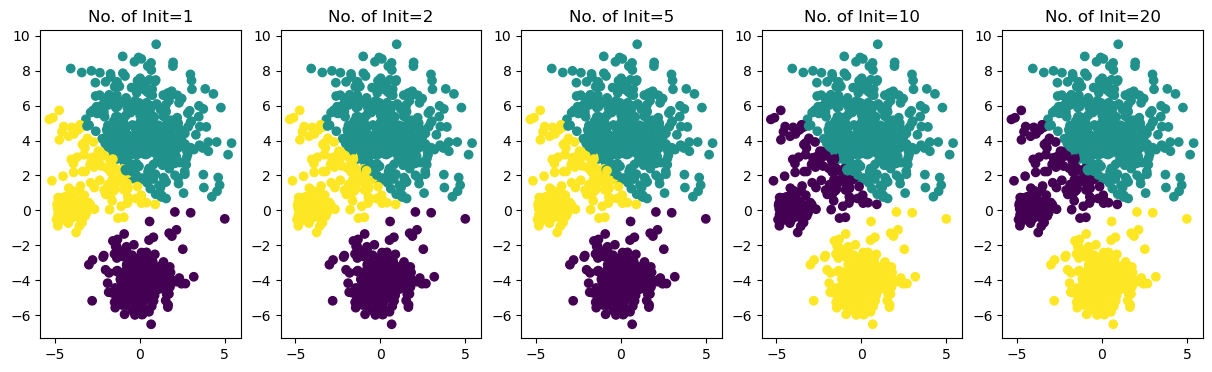

In [12]:
n_init = np.array([1,2,5,10,20])

fig, ax = plt.subplots(1,n_init.shape[0],figsize=(15,4))
for n in range(n_init.shape[0]):
    kmeans_n = KMeans(n_clusters = 3, n_init = n_init[n], random_state=0).fit(X)
    ax[n].scatter(X[:,0], X[:,1], c=kmeans_n.labels_)
    ax[n].set_title("No. of Init="+str(n_init[n]))


In [13]:
for n in range(n_init.shape[0]):
    kmeans_n = KMeans(n_clusters = 3, n_init = n_init[n], random_state=0).fit(X)
    print("WCV="+str(round(kmeans_n.inertia_,4))+' for no. of init ='+ str(n_init[n]))


WCV=3729.2345 for no. of init =1
WCV=3728.8418 for no. of init =2
WCV=3728.8418 for no. of init =5
WCV=3728.8376 for no. of init =10
WCV=3728.8376 for no. of init =20


In this case, the same solution is found with at least ten different initializations (although with at least two is very similar). However, if we change the random state, in some cases we find that we need more initializations. In general, it is recommended to run with a large number of initializations, such as 20 or even 50, to avoid undesirable local optima. 

#### Task 5

Since we simulated the data, we know the true number of clusters. However, in practice this number is rarely known. Find the K-means solution with different choices of $K$ and plot the within-cluster variation as a function of $K$. Comment on the results.

In [14]:
K = np.arange(1,11)
WCV = np.zeros(K.shape)

for i in range(K.shape[0]):
    kmeans_K = KMeans(n_clusters = K[i], n_init = 20, random_state=0).fit(X)
    WCV[i] = kmeans_K.inertia_


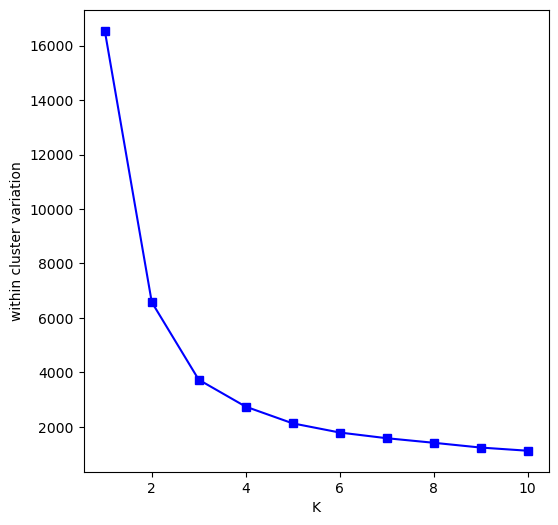

In [15]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.plot(K, WCV, c='b',marker='s')
plt.xlabel('K')
plt.ylabel('within cluster variation')
plt.show()

There does appears to some leveling off after three clusters.

#### Task 6

Now standardize the data and re-run the K-means algorithm. Qualitatively, how has standardising the data impacted performance? Can you argue why you observe what you see?

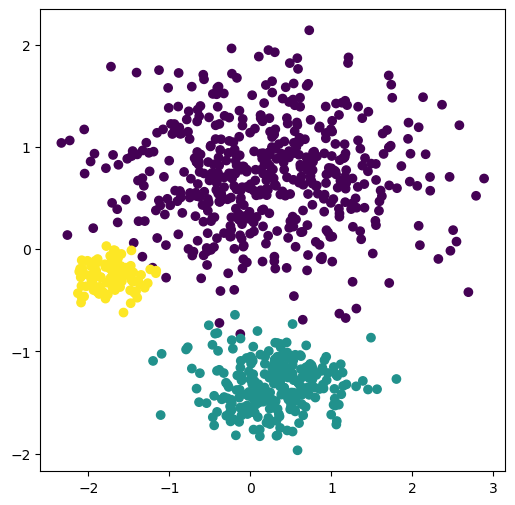

In [16]:
from sklearn.preprocessing import StandardScaler

Xs = StandardScaler().fit_transform(X)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(Xs[:,0], Xs[:,1], c=cl)
plt.show()

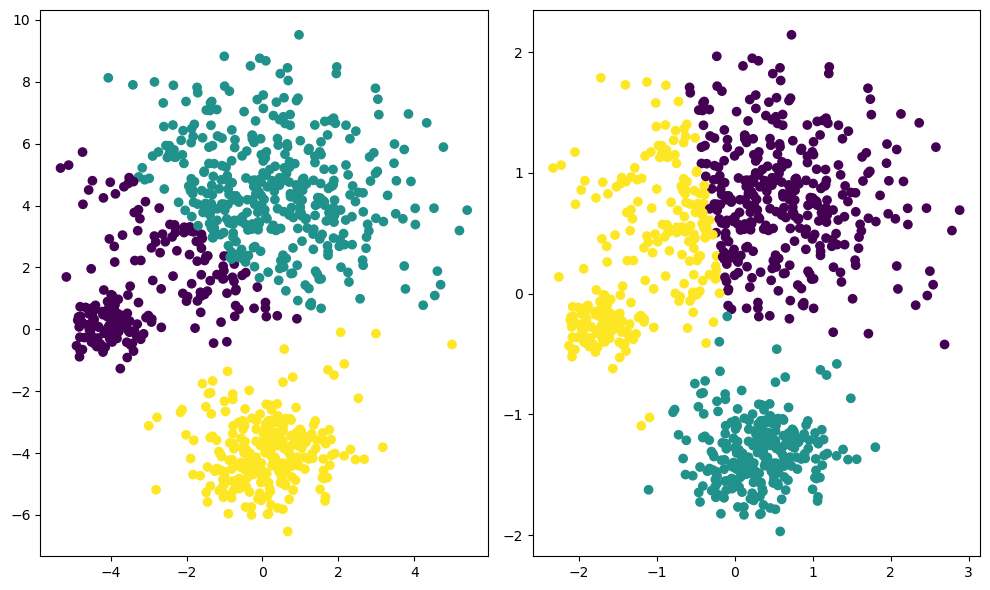

In [17]:
kmeans_nos = KMeans(n_clusters = 3, n_init = 20, random_state=0).fit(X)
kmeans_s = KMeans(n_clusters = 3, n_init = 20, random_state=0).fit(Xs)

fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].scatter(X[:,0], X[:,1], c=kmeans_nos.labels_)
ax[1].scatter(Xs[:,0], Xs[:,1], c=kmeans_s.labels_)
fig.tight_layout()

When we standardize the data, more of the large cluster 1 is grouped with the smaller cluster 3. As we discussed in lectures, standardizing the features is equivalent to weighting features in the dissimilarity by $1/\text{Var}(X_d)$. Thus, when standardizing, the influence of the second feature is reduced by approx $1/4$ relative to the first feature. As the second feature is important in distinguishing the smallest cluster 3 from the other two, this cluster gets obscured when standardizing. 

In [18]:
np.std(X,axis=0)**2

array([ 4.21293883, 15.25401443])

# Hierarchical Clustering: Simulated Example <a id='hc'></a>

To perform hierarchical clustering, we will use the [`linkage()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function from `scipy.cluster.hierarchy`. The inputs to specify include

-  the data. 
- `metric`: specifies the dissimarlity between data points. Defaults to the Euclidean distance.
- `method`: specifies the type of linkage, e.g. complete, single, or average.

Then, we can use [`dendrogram()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) from `scipy.cluster.hierarchy` to plot the dendrogram.

#### Task 7

a) Use hierarchical clustering with complete linkage to cluster the simulated data.

In [19]:
hc_comp = hierarchy.linkage(X, method='complete')

b) Plot the dendogram by running the code below. Try changing the 'color_threshold' to a number (e.g. 11) to color the branches of the tree below the threshold with different colors, thus, identifying the clusters if the tree were to be cut at that threshold.

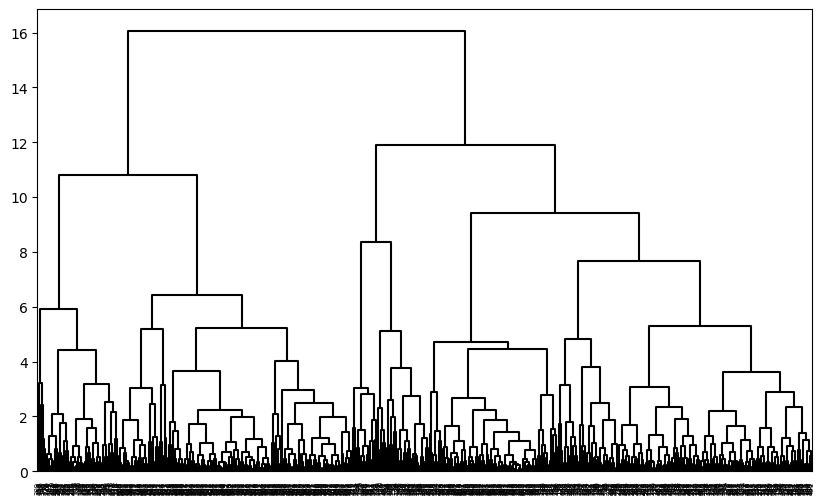

In [20]:
cargs = {'color_threshold': -np.inf,'above_threshold_color':'black'}
fig, ax = plt.subplots(1, 1, figsize=(10,6))
hierarchy.dendrogram(hc_comp, ax=ax, **cargs)
plt.show()

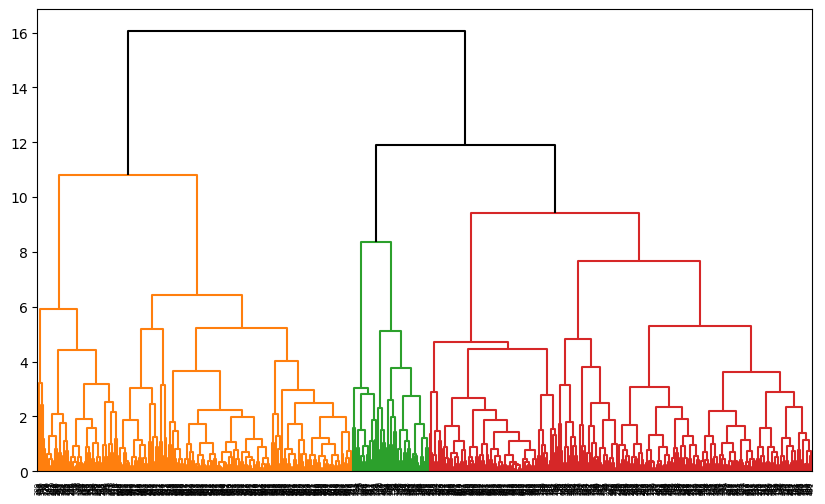

In [21]:
cargs = {'color_threshold': 11,'above_threshold_color':'black'}
fig, ax = plt.subplots(1, 1, figsize=(10,6))
hierarchy.dendrogram(hc_comp, ax=ax, **cargs)
plt.show()

c) Now, use the function `cut_tree()` from `scipy.cluster.hierarchy` to determine the cluster labels associated with a given cut of the dendrogram. You can either specify the number of clusters via `n_clusters` or the height/threshold at which to cut via `height`. Plot the data colored by cluster membership.

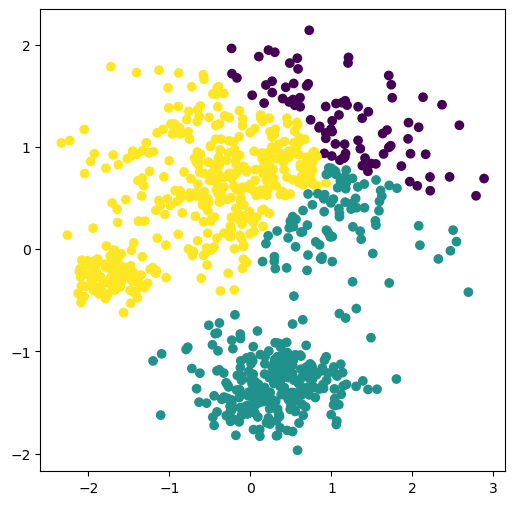

In [22]:
hc_cl = hierarchy.cut_tree(hc_comp, n_clusters=3)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(Xs[:,0], Xs[:,1], c=hc_cl)
plt.show()

#### Task 8

Now try changing the linkage to single and average. Does this affect on the results?

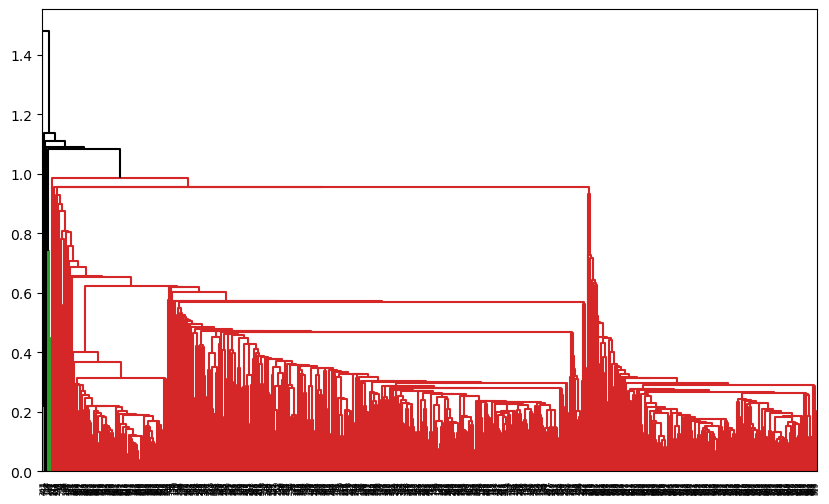

In [24]:
cargs = {'color_threshold': 1,'above_threshold_color':'black'}
hc_sing = hierarchy.linkage(X, method='single')
fig, ax = plt.subplots(1, 1, figsize=(10,6))
hierarchy.dendrogram(hc_sing, ax=ax, **cargs)
plt.show()

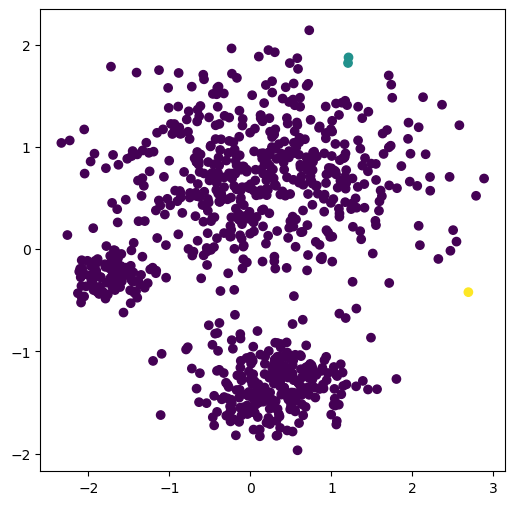

In [25]:
hc_cl = hierarchy.cut_tree(hc_sing, n_clusters=3)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(Xs[:,0], Xs[:,1], c=hc_cl)
plt.show()

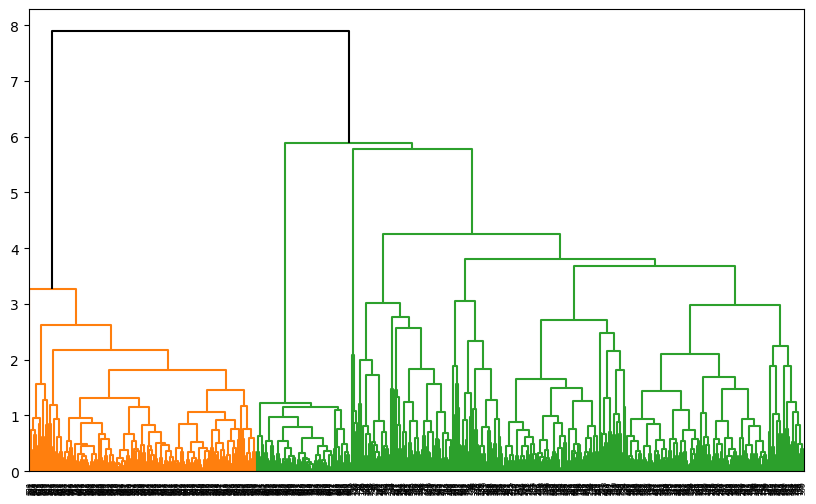

In [29]:
cargs = {'color_threshold': 6,'above_threshold_color':'black'}
hc_avg = hierarchy.linkage(X, method='average')
fig, ax = plt.subplots(1, 1, figsize=(10,6))
hierarchy.dendrogram(hc_avg, ax=ax, **cargs)
plt.show()

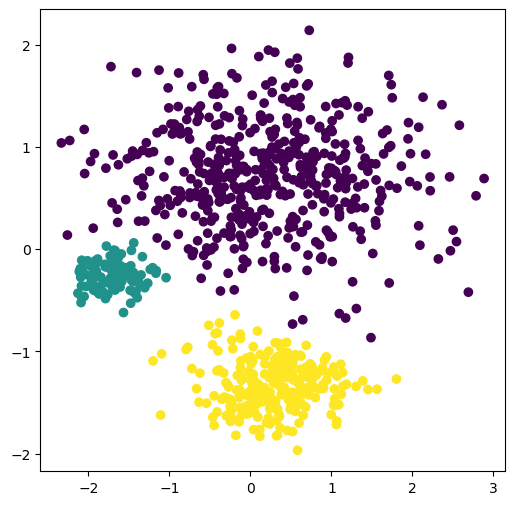

In [28]:
hc_cl = hierarchy.cut_tree(hc_avg, n_clusters=3)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(Xs[:,0], Xs[:,1], c=hc_cl)
plt.show()

Yes, this has a great effect on the results. The results with single linkage do not recover the clusters well. Instead, average linkage is very close to the true clustering in this example.

# Gene Expression Data <a id='genedata'></a>

Now, we will consider a more complex real dataset with a larger feature space. 

The dataset is the **NCI cancer microarray dataset** discussed in both *Introduction to Statistical Learning* and  *Elements of Statistical Learning*. The dataset consists of $D=6830$ gene expression measurements for each of $N=64$ cancer cell lines. The aim is to determine whether there are groups among the cell lines based on their gene expressions. This is an example of a high-dimensional dataset with $D$ much larger than $N$, which makes visualization difficult. The $N=64$ cancer cell lines have been obtained from samples of cancerous tisses, corresponding to 14 different types of cancer. However, our focus remains unsupervised learning and we will use the cancer labels only to plot. 

We first need to read in the dataset.

In [30]:
#Fetch the data and cancer labels
url_data = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/nci.data.csv'
url_labels = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/nci.label.txt'

X = pd.read_csv(url_data)
y = pd.read_csv(url_labels, header=None)

# clean data and follow convention in the notes that features are columns:
X = X.drop(labels='Unnamed: 0', axis=1).T

In [31]:
X.shape

(64, 6830)

In [32]:
y.shape

(64, 1)

Let's visualise the data with a contour plot.

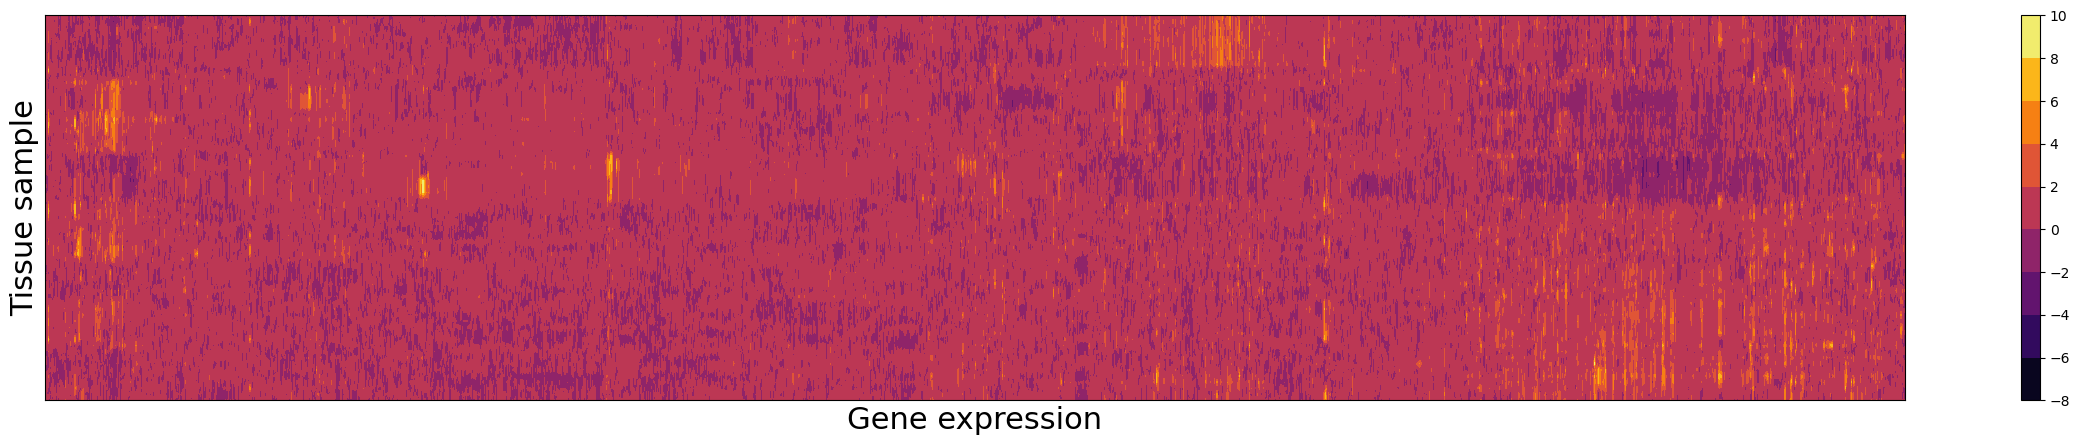

In [33]:
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(111)
contours = ax.contourf(X, cmap='inferno')#, vmax=4, vmin=-4)
cbar = plt.colorbar(contours)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Gene expression", fontsize=22)
ax.set_ylabel("Tissue sample", fontsize=22)
plt.show()

We now convert our pandas dataframe into a numpy array and create integer labels for cancer type (for plotting purposes)

If you visualise the labels, you will notice there are lots of inconsistencies with white space etc. Run the following code to clean the labels.

In [34]:
y.value_counts()

RENAL                         4
OVARIAN                       4
MELANOMA                      3
NSCLC                         3
COLON                         3
BREAST                        2
NSCLC                         2
MELANOMA                      2
NSCLC                         2
LEUKEMIA                      2
PROSTATE                      2
COLON                         2
CNS                           2
CNS                           2
BREAST                        2
RENAL                         2
MELANOMA                      2
RENAL                         1
RENAL                         1
OVARIAN                       1
OVARIAN                       1
NSCLC                         1
NSCLC                         1
RENAL                         1
MCF7D-repro                   1
MELANOMA                      1
BREAST                        1
MCF7A-repro                   1
LEUKEMIA                      1
LEUKEMIA                      1
LEUKEMIA                      1
LEUKEMIA

In [35]:
y_clean = np.asarray(y).flatten()
for j in range(y_clean.size):
    y_clean[j] = y_clean[j].strip()
np.unique(y_clean, return_counts = True)
cancer_types = list(np.unique(y_clean))
cancer_groups = np.array([cancer_types.index(lab) for lab in y_clean])

In [37]:
print(cancer_types)

['BREAST', 'CNS', 'COLON', 'K562A-repro', 'K562B-repro', 'LEUKEMIA', 'MCF7A-repro', 'MCF7D-repro', 'MELANOMA', 'NSCLC', 'OVARIAN', 'PROSTATE', 'RENAL', 'UNKNOWN']


In [38]:
X_array = np.asarray(X)

#### Task 9

Perform a PCA of $\mathbf X$ to visualize the data. Plot the first few principal component scores and color by cancer type. Do cell lines within the same cancer types seems to have similar scores? Make a scree plot of the proportion of variance explained. How many components does this suggest?

In [39]:
from sklearn.decomposition import PCA

nci_pca = PCA()
nci_scores = nci_pca.fit_transform(X_array)

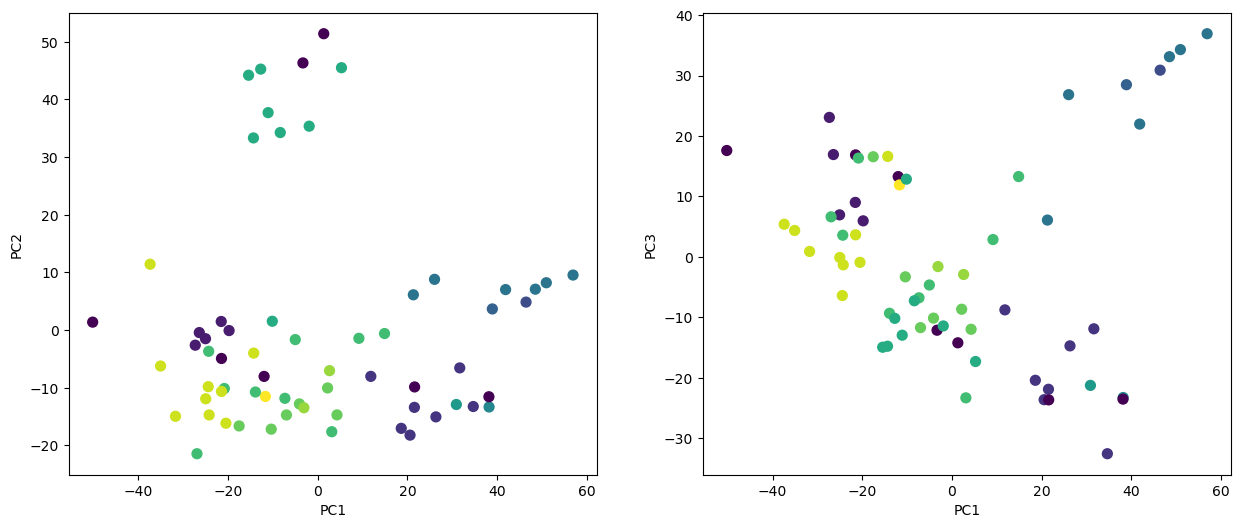

In [40]:
figs, axes = plt.subplots(1,2, figsize=(15,6))
ax = axes[0]
ax.scatter(nci_scores[:,0],nci_scores[:,1],c=cancer_groups,marker='o',s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax = axes[1]
ax.scatter(nci_scores[:,0],nci_scores[:,2],c=cancer_groups,marker='o',s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC3')
plt.show()

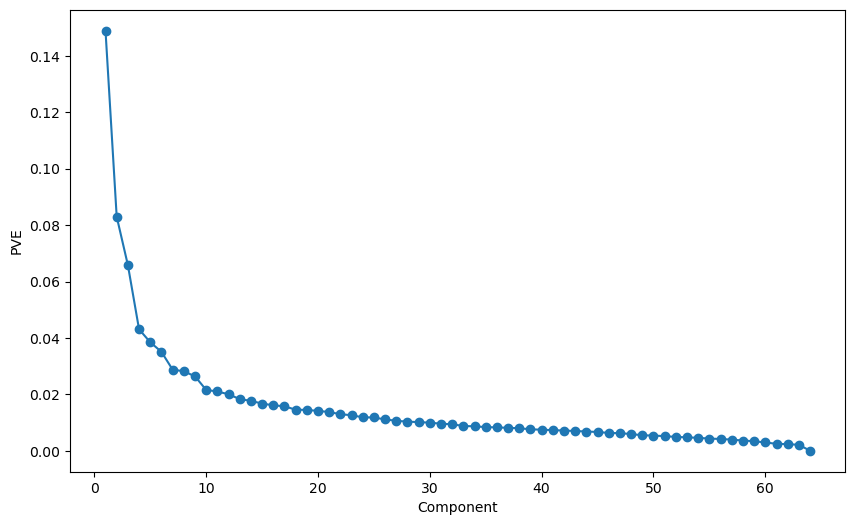

In [41]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ticks = np.arange(nci_pca.n_components_)+1
ax.plot(ticks,nci_pca.explained_variance_ratio_,marker='o')
ax.set_xlabel('Component')
ax.set_ylabel('PVE')
plt.show()

In [42]:
sum(nci_pca.explained_variance_ratio_[0:6])

0.41436706962962266

There does seem to be an elbow around 7 components, which together explain approx 41% of the variance. 

# Hierarchical Clustering: Gene Expression Data <a id='hc_genedata'></a>

Now, let's perform hierarchical clustering on the gene expression data. 

#### Task 10

a) Plot the dendrogram with complete, single, and average linkage. Does the choice of linkage affect the results? Which linkage would you choose?

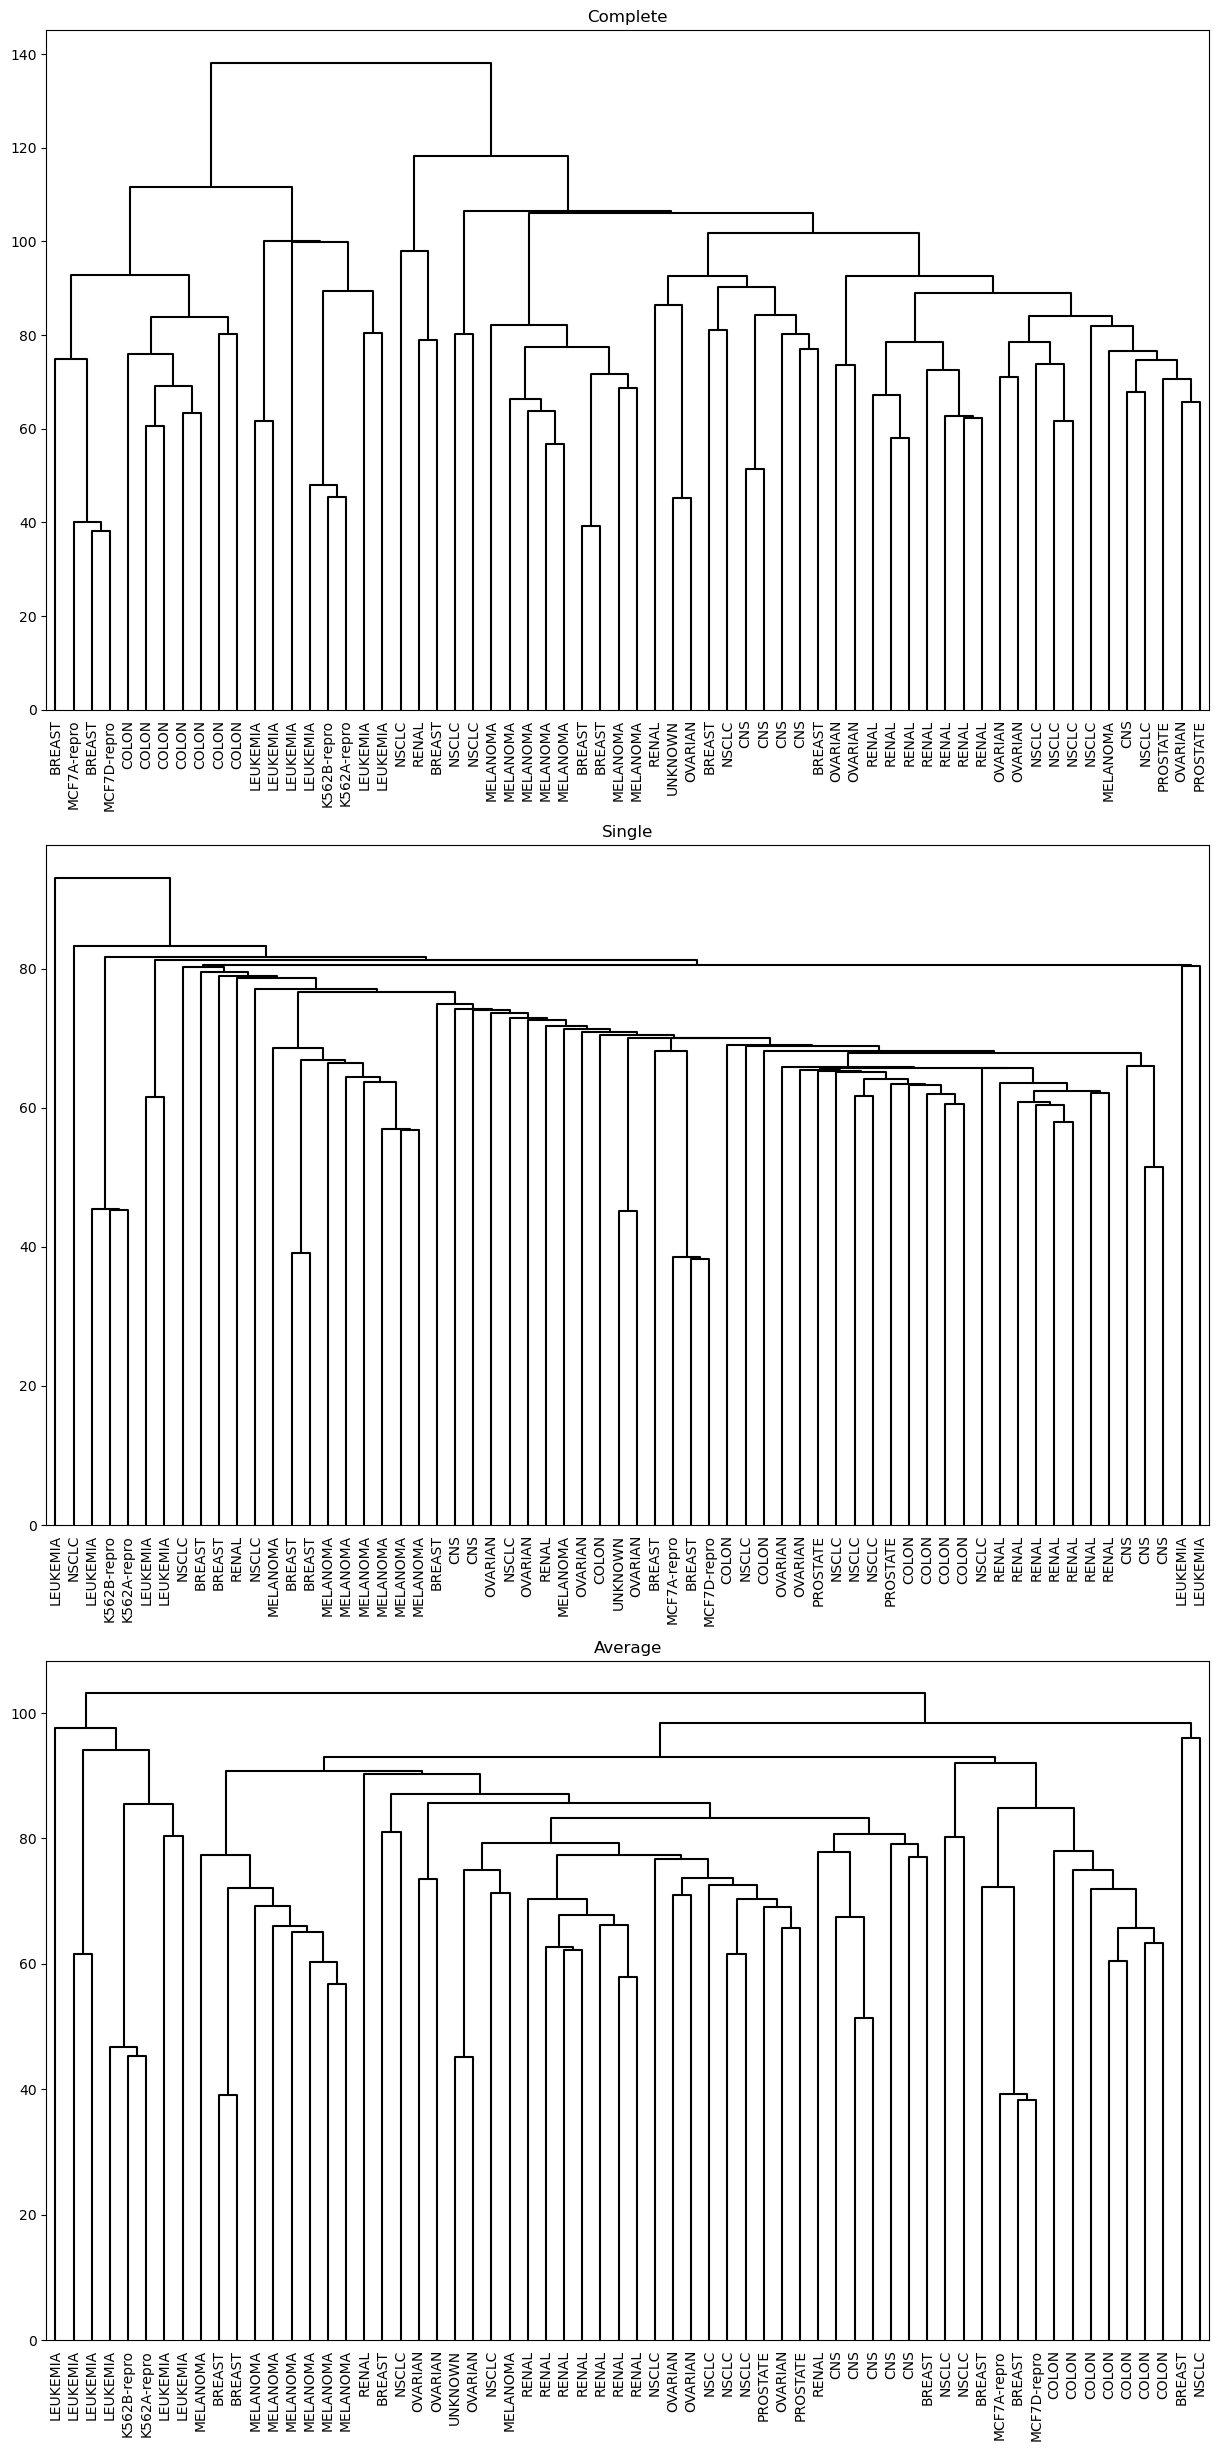

In [43]:
hc_comp = hierarchy.linkage(X, method='complete')
hc_sing = hierarchy.linkage(X, method='single')
hc_avg = hierarchy.linkage(X, method='average')
fig, ax = plt.subplots(3,1, figsize=(15,30))
hierarchy.dendrogram(hc_comp, ax=ax[0], labels = np.asarray(y_clean), leaf_font_size=10, **cargs)
hierarchy.dendrogram(hc_sing, ax=ax[1], labels = np.asarray(y_clean), leaf_font_size=10, **cargs)
hierarchy.dendrogram(hc_avg, ax=ax[2], labels = np.asarray(y_clean), leaf_font_size=10, **cargs)
ax[0].set_title('Complete')
ax[1].set_title('Single')
ax[2].set_title('Average')
plt.show()

Single linkage tends to produce trailing clusters, that is, a very large cluster onto which single data points attach one-by-one. Complete and average produce more balanced clusters, and thus are generally preferred. 

b) Select a linkage and a number of clusters (by examining the dendrogram and jumps in the heights of the clusters merged). Plot the dendogram and color the branches to identify the clusters. Use the option `labels = np.asarray(y_clean), leaf_font_size=10` in `hierarchy.dendrogram` to add the cancer types as labels for each data point. Do you observe any patterns between the clusters and cancer types?

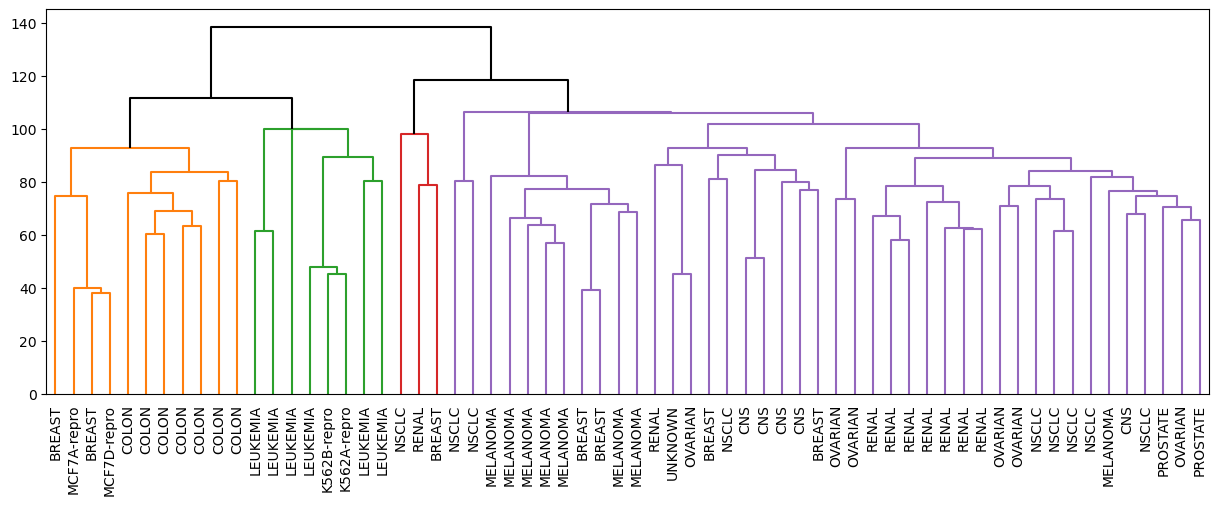

In [44]:
cargs = {'color_threshold': 110,'above_threshold_color':'black'}
fig, ax = plt.subplots(1, 1, figsize=(15,5))
hierarchy.dendrogram(hc_comp, ax=ax, labels = np.asarray(y_clean), leaf_font_size=10, **cargs)
plt.show()

In [45]:
comp_cl = hierarchy.cut_tree(hc_comp, n_clusters=4)
pd.crosstab(pd.Series(y_clean, name='Cancer'), pd.Series(comp_cl.reshape(-1), name ='HC'))

HC,0,1,2,3
Cancer,,,,
BREAST,4,1,0,2
CNS,5,0,0,0
COLON,0,0,0,7
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,0,0,6,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,8,0,0,0


There are some clear patterns. All the leukemia cell lines belong to one cluster and all the colon cell lines belong to another cancer. However the breast cancer cell lines are spread across three of the different clusters. 

Note: you answer and choice of linkage and number of clusters may vary. 

# K-means Clustering: Gene Expression Data <a id='kmeans_genedata'></a>

Now, let's perform k-means clustering on the gene expression data.

#### Task 11

Perform K-means clustering with the same number of clusters that you selected for hierarchical clustering. Are the results similar?

In [46]:
kmeans = KMeans(n_clusters = 4, n_init = 20, random_state=0).fit(X)

pd.crosstab(pd.Series(kmeans.labels_,name = 'K-means'),pd.Series(comp_cl.reshape(-1),name = 'HC'))

HC,0,1,2,3
K-means,,,,
0,26,3,0,0
1,7,0,1,11
2,9,0,0,0
3,0,0,7,0


First note, that the clusters labels are arbitary and swapping the labels does not change the clustering solution. We find that one cluster is identical in both solutions. However, the first cluster in K-means groups together points from cluster 1 and 4 in hierarchical clustering.

#### Task 12

Plot the two clustering solutions along with a plot of the data colored by the cancer types in the space spanned by the first two principal components.

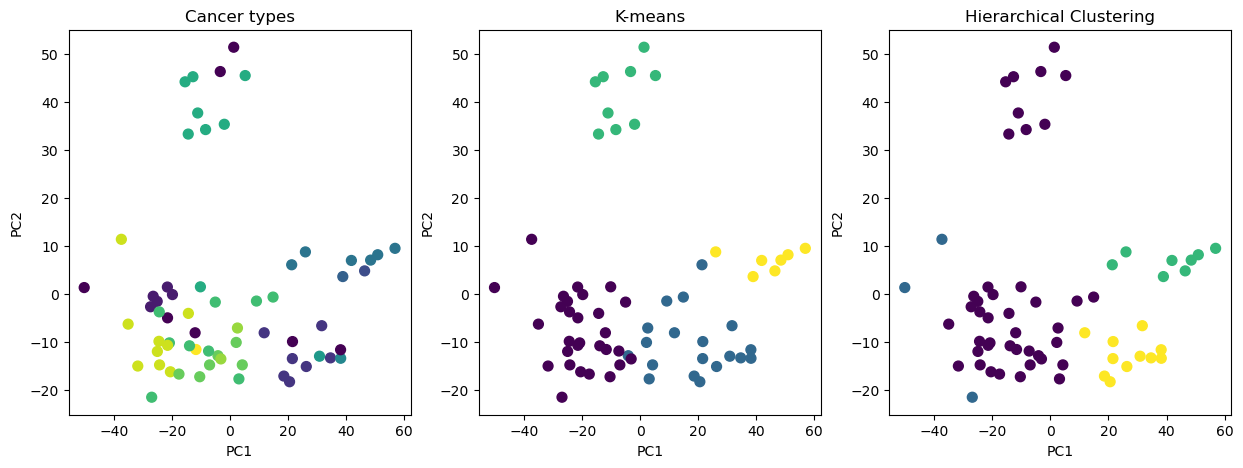

In [47]:
figs, axes = plt.subplots(1,3, figsize=(15,5))
ax = axes[0]
ax.scatter(nci_scores[:,0],nci_scores[:,1],c=cancer_groups,marker='o',s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Cancer types')
ax = axes[1]
ax.scatter(nci_scores[:,0],nci_scores[:,1],c=kmeans.labels_,marker='o',s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('K-means')
ax = axes[2]
ax.scatter(nci_scores[:,0],nci_scores[:,1],c=comp_cl,marker='o',s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Hierarchical Clustering')
plt.show()

In [ ]:
!jupyter nbconvert --to pdf mlp_week03_key.ipynb 